In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_results(path):
    results = []
    with open(path) as text:
        for line in text:
            if 'val_acc1' in line:
                i = line.index(':', -25)
                results.append(float(line[i+2:-2]))
    return results

In [3]:
L3eidiv = get_results('./rs29/3Leidiv_rs29.txt')
L5eidiv = get_results('./rs29/5Leidiv_rs29.txt')
#L7eidiv = get_results('./rs29/7Leidiv_rs29.txt')
L3 = get_results('./rs29/3L_rs29.txt')
L5 = get_results('./rs29/5L_rs29.txt')
L7 = get_results('./rs29/7L_rs29.txt')

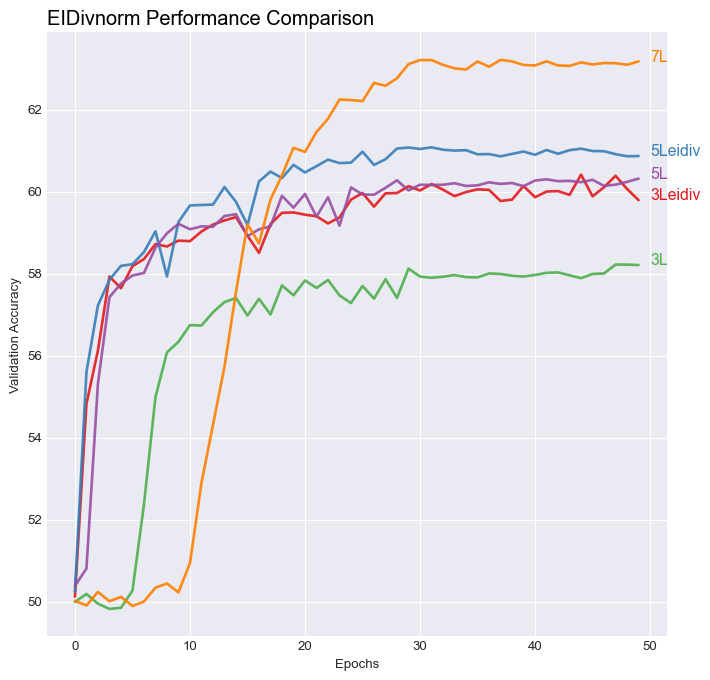

In [4]:
lines = np.array([np.asarray(L3eidiv), np.asarray(L5eidiv), np.asarray(L3), np.asarray(L5), np.asarray(L7)])
name_list = np.array(['3Leidiv', '5Leidiv', '3L', '5L', '7L'])

#setup plot
plt.style.use('seaborn-darkgrid')
dpi = 96
plt.figure(figsize=(800/dpi, 800/dpi), dpi=dpi)
palette = plt.get_cmap('Set1')
#draw lines
for i in range(lines.shape[0]):
    plt.plot(lines[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
#mark lines
for i in range(lines.shape[0]):
    plt.text(50, lines[i,-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

#plt.legend(loc=2, ncol=2)
plt.title("EIDivnorm Performance Comparison", loc='left', fontsize=15, fontweight=0, color='black')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()